In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [201]:
gen_df = pd.read_csv('Plant_1_Generation_Data.csv')
np.sum(gen_df.isnull())
print('No null values')
print(gen_df.describe())
#I shall leave only 1st 2 letters of the SOURCE KEY to reduce clutter
gen_df['SOURCE_KEY'] = gen_df['SOURCE_KEY'].str[0:2]
# I shall change date time, which is currently string values to date_time values
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'])
                                     


No null values
        PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06


Text(0.5, 1.0, 'Total Production for Each Inverter')

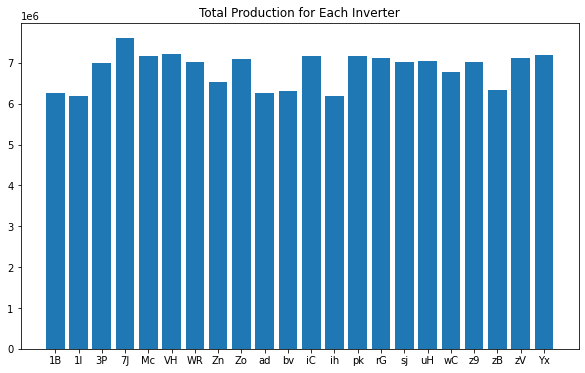

In [202]:
gen_df.drop_duplicates(subset=['SOURCE_KEY'])
inverters = gen_df.drop_duplicates(subset=['SOURCE_KEY'])['SOURCE_KEY']
inverter_yields = gen_df.drop_duplicates(subset=['SOURCE_KEY'])['TOTAL_YIELD']
plt.figure(figsize=(10,6))
plt.bar(x = inverters, height = inverter_yields)
plt.title('Total Production for Each Inverter')
#I think this would be useful for deciding if any equipment is faulty

In [4]:
gen_df.groupby('SOURCE_KEY').max()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
SOURCE_KEY,,,,,,
1B,2020-12-06 23:45:00,4135001,13335.14286,1300.171429,8268.0,6485319.0
1I,2020-12-06 23:45:00,4135001,14302.71429,1394.514286,9048.0,6433566.0
3P,2020-12-06 23:45:00,4135001,14351.12500,1399.225000,9068.0,7237425.0
7J,2020-12-06 23:45:00,4135001,14204.00000,1384.871429,8779.0,7846821.0
Mc,2020-12-06 23:45:00,4135001,14418.42857,1405.800000,8964.0,7408587.0
VH,2020-12-06 23:45:00,4135001,14299.85714,1394.214286,9013.0,7456208.0
WR,2020-12-06 23:45:00,4135001,14116.25000,1376.350000,8879.0,7273532.0
Yx,2020-12-06 23:45:00,4135001,14466.85714,1410.528571,8818.0,7425442.0
Zn,2020-12-06 23:45:00,4135001,14273.28571,1391.642857,8910.0,6770737.0


In [204]:
weather_df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'])
weather_df = weather_df.drop(columns=['SOURCE_KEY','PLANT_ID']) #I dropped source key and plant id columns, since they're same

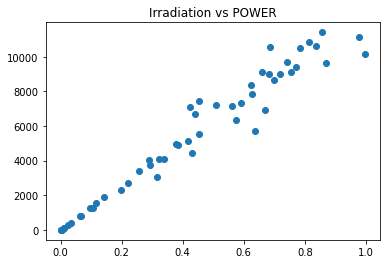

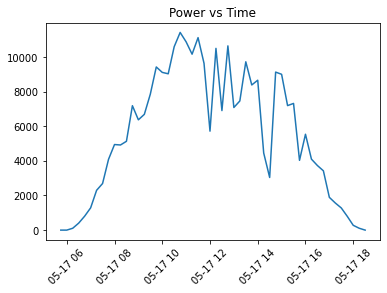

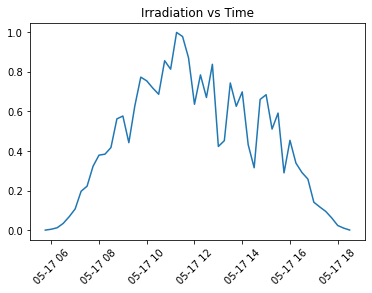

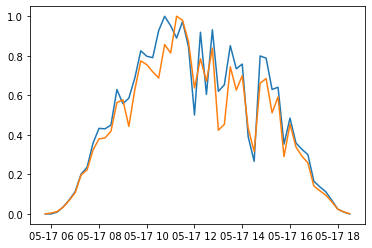

In [205]:
#I shall now take a look at data when sun is shining (i.e irradiation is greater than 0)
comb_df[comb_df['IRRADIATION']>0].describe()
#It's possible for sun to be shining and power to be 0, but reverse is not true.
#I shall now draw a diagram of random inverter power over course of day
df_sunny = comb_df[comb_df['IRRADIATION']>0]
df1B = df_sunny[df_sunny['SOURCE_KEY']=='1B']
df1B17 = df1B[(df1B['DATE_TIME']>pd.to_datetime('2020-05-17'))&(df1B['DATE_TIME']<pd.to_datetime('2020-05-18'))]
#So date time converts date to the beginning of that date i.e. 12am
df1B17
# Now I plot power output and irradiatiation
plt.figure()
plt.scatter(df1B17['IRRADIATION'],df1B17['DC_POWER'])
plt.title('Irradiation vs POWER')
# Irradiation and power are pretty linear
#Now power vs time
plt.figure()
plt.plot(df1B17['DATE_TIME'],df1B17['DC_POWER'])
plt.xticks(rotation=45)
plt.title('Power vs Time')
#Now irradiation vs time
plt.figure()
plt.plot(df1B17['DATE_TIME'],df1B17['IRRADIATION'])
plt.xticks(rotation=45)
plt.title('Irradiation vs Time')
#And lastly, normalized power and normalized irradiation against time
power_range = np.max(df1B17['DC_POWER'])-np.min(df1B17['DC_POWER'])
norm_power = df1B17['DC_POWER']/power_range
irradiation_range = np.max(df1B17['IRRADIATION'])-np.min(df1B17['IRRADIATION'])
norm_irradiation = df1B17['IRRADIATION']/irradiation_range
plt.figure()
plt.plot(df1B17['DATE_TIME'],norm_power)
plt.plot(df1B17['DATE_TIME'],norm_irradiation)

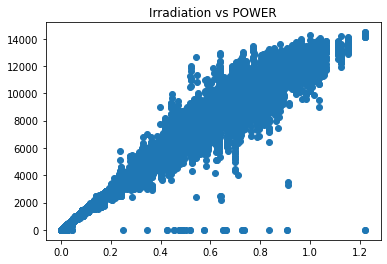

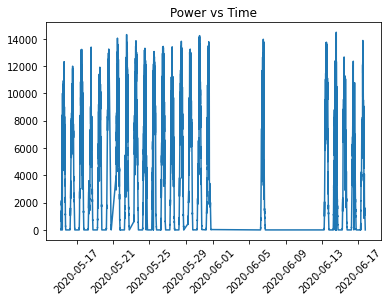

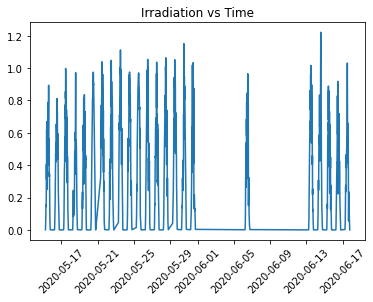

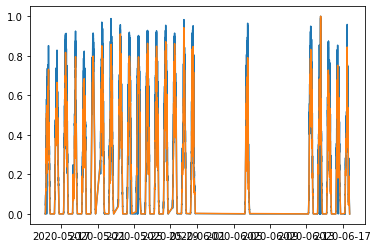

In [206]:
#I now repeat the things done above for all inverters, and all days. The next step would be to find if one inverter is substantially
# different (and suspect a fault) or if it drops out once in a while (and suspect need for cleaning)
plt.figure()
plt.scatter(df_sunny['IRRADIATION'],df_sunny['DC_POWER'])
plt.title('Irradiation vs POWER')
# Irradiation and power are pretty linear
#Now power vs time
plt.figure()
plt.plot(df_sunny['DATE_TIME'],df_sunny['DC_POWER'])
plt.xticks(rotation=45)
plt.title('Power vs Time')
#Now irradiation vs time
plt.figure()
plt.plot(df_sunny['DATE_TIME'],df_sunny['IRRADIATION'])
plt.xticks(rotation=45)
plt.title('Irradiation vs Time')
#And lastly, normalized power and normalized irradiation against time
power_range = np.max(df_sunny['DC_POWER'])-np.min(df_sunny['DC_POWER'])
norm_power = df_sunny['DC_POWER']/power_range
irradiation_range = np.max(df_sunny['IRRADIATION'])-np.min(df_sunny['IRRADIATION'])
norm_irradiation = df_sunny['IRRADIATION']/irradiation_range
plt.figure()
plt.plot(df_sunny['DATE_TIME'],norm_power)
plt.plot(df_sunny['DATE_TIME'],norm_irradiation)


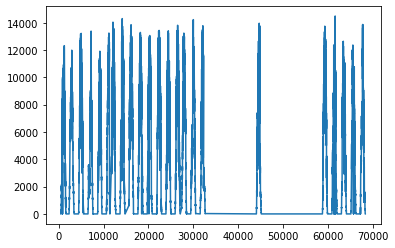

In [207]:
plt.figure()
plt.plot(df_sunny['DC_POWER'])

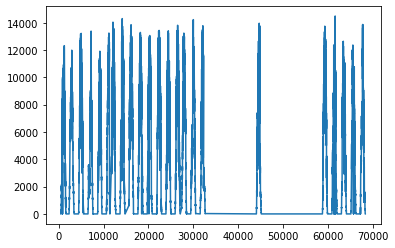

In [11]:
plt.figure()
plt.plot(df_sunny['DC_POWER'])

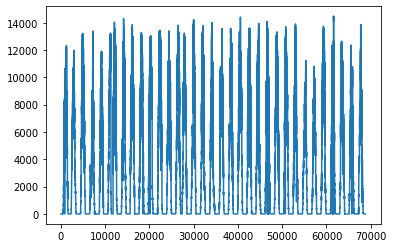

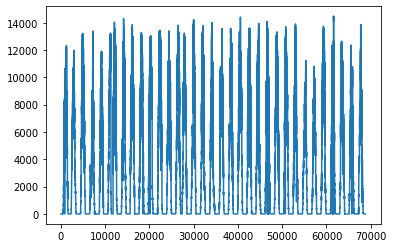

In [25]:
plt.figure()
plt.plot(gen_df['DC_POWER'])
plt.figure()
plt.plot(comb_df['DC_POWER'])

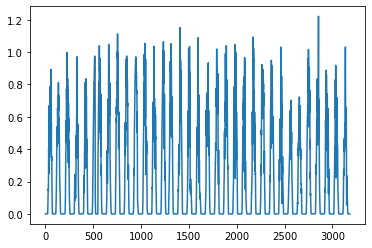

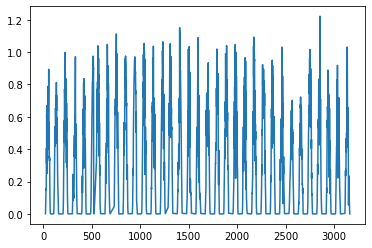

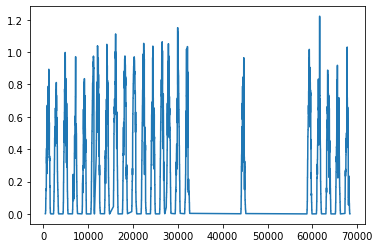

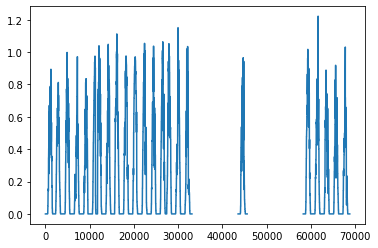

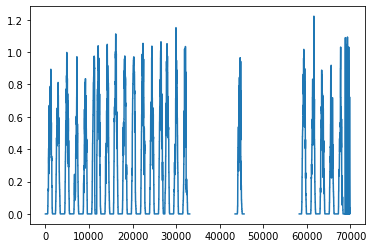

In [38]:
plt.figure()
plt.plot(weather_df['IRRADIATION'])
weather_df[weather_df['IRRADIATION']>0]
plt.figure()
plt.plot(weather_df[weather_df['IRRADIATION']>0].IRRADIATION)
plt.figure()
plt.plot(df_sunny.IRRADIATION)
plt.figure()
plt.plot(comb_df.IRRADIATION)
comb_df1 = gen_df.merge(weather_df,how='outer', left_on='DATE_TIME', right_on='DATE_TIME')
plt.figure()
plt.plot(comb_df1.IRRADIATION)

In [ ]:
#BELOW I GOT DATA AND MERGED TABLES AND FILLED IN ZEROS WHERE DATA WAS MISSING

In [209]:
from datetime import datetime, timedelta

In [210]:
#Since generation data has large time irregularities, and weather data small ones (but noticeable)
#I am going to create a new range of perfect values for date time based on weather data, and where these are missing zeros 
#Shall be filled in
start = np.min(weather_df.DATE_TIME)
len_range = (np.max(weather_df.DATE_TIME)-np.min(weather_df.DATE_TIME))/timedelta(minutes=15)
perfect_range = [start+i*timedelta(minutes=15) for i in np.arange(0, len_range+1)]
perfect_range = pd.DataFrame(perfect_range, columns = ['DATE_TIME'])
# Interesting note, this perfect range is longer than the original weather df column
# Since in the original column some values were missing

In [211]:
# So now I shall generate weather_df with the perfect range
new_weather = perfect_range.merge(weather_df, how='outer', left_on = 'DATE_TIME', right_on = 'DATE_TIME')
#The below code is unnecessary, but it's to check if we have null values(we should, since lengths were differen!)
#I'm slightly paranoid about joins
#np.sum(new_weather.AMBIENT_TEMPERATURE.isnull())
new_weather.fillna(0, inplace=True)

In [212]:
#Now I shall generate an index of all valid inverters and date combinations
gen_df.SOURCE_KEY.unique()
comb_index = []
for date in perfect_range['DATE_TIME']:
    for inverter in gen_df.SOURCE_KEY.unique():
        comb_index.append((date, inverter))

In [213]:
all_possible = pd.DataFrame(comb_index,columns = ['DATE_TIME', 'SOURCE_KEY'] )

In [246]:
# And now I outer merge with new_weather df and gen_df. Final results should have 71808 rows
new_comb = all_possible.merge(new_weather, how='left', left_on = 'DATE_TIME', right_on = 'DATE_TIME')
new_comb = new_comb.merge(gen_df, how='left', left_on = ['DATE_TIME', 'SOURCE_KEY'], right_on = ['DATE_TIME', 'SOURCE_KEY'])
#I shall add a column, if 1 it means data was missing and has been artificially added as 0
new_comb['ARTIFICIAL'] = [int(i) for i in new_comb.isnull().any(axis=1)]
new_comb.fillna(0, inplace=True)

In [247]:
new_comb['AMBIENT_TEMPERATURE'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['AMBIENT_TEMPERATURE'])
new_comb['MODULE_TEMPERATURE'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['MODULE_TEMPERATURE'])
new_comb['IRRADIATION'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['IRRADIATION'])
new_comb['PLANT_ID'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['PLANT_ID'])
new_comb['DC_POWER'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['DC_POWER'])
new_comb['AC_POWER'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['AC_POWER'])
new_comb['DAILY_YIELD'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['DAILY_YIELD'])
new_comb['TOTAL_YIELD'] = np.where(new_comb['ARTIFICIAL'] ==1, 0, new_comb['TOTAL_YIELD'])





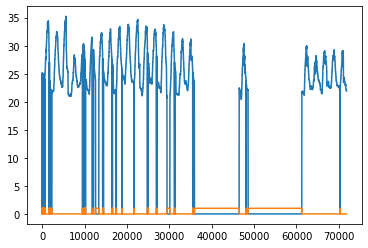

In [252]:
plt.figure()
plt.plot(new_comb.AMBIENT_TEMPERATURE)
plt.plot(new_comb.ARTIFICIAL)

In [254]:
new_comb.ARTIFICIAL.value_counts()

0    45680
1    26128
Name: ARTIFICIAL, dtype: int64

In [255]:
new_comb

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,ARTIFICIAL
0,2020-05-15 00:00:00,1B,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,6259559.0,0
1,2020-05-15 00:00:00,1I,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,6183645.0,0
2,2020-05-15 00:00:00,3P,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,6987759.0,0
3,2020-05-15 00:00:00,7J,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,7602960.0,0
4,2020-05-15 00:00:00,Mc,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,7158964.0,0
5,2020-05-15 00:00:00,VH,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,7206408.0,0
6,2020-05-15 00:00:00,WR,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,7028673.0,0
7,2020-05-15 00:00:00,Zn,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,6522172.0,0
8,2020-05-15 00:00:00,Zo,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,7098099.0,0
9,2020-05-15 00:00:00,ad,25.184316,22.857507,0.0,4135001.0,0.0,0.0,0.000000,6271355.0,0


In [ ]:
##New_comb is the final merged data